In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

e = math.e

# The python definition of f(x) for problem 1.

def problem_function(x):
    if (x <= 100):
        return float(-e**(-(x/100)**2))
    else:
        return float(-e**(-1) + (x - 100)*(x - 102))

In [2]:
import os
import sys
import random

# Some definitions for the following variables which will be used in simulated annealing.
'''
        f               :   The function which metaheuristics are being used to test.
        s_0             :   Initial solution.
        t_0             :   Initial temperature.
        temp_reduc_func :   Temperature reduction function.
        acc_prob_func   :   Acceptance probability function.
        stop_cond       :   The function which yields a boolean value of whether to continue the algorithm.
        max_i           :   The maximum amount of iterations
        max_epoch       :   The amount of epochs before the the temperature reduction function is used. 
'''


def simulated_annealing(f, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch):
    # Sets the initial value of s_n (when n = 0)
    solution = s_0
    # Sets the initial value of s_n-1 (not used for the first iteration of the outer loop)
    prev_solution = s_0
    # The current temperature
    temperature = t_0
    # The iterations of the outer (while) loop.
    iteration_counter = 0
    step_array = []
    while (iteration_counter == 0 or not stop_cond(iteration_counter, max_i, solution, prev_solution)):
        print("--------------------------------------------------------------------------------------------\ns_%d: %f" %
              (iteration_counter, solution))
        prev_solution = solution
        step_array.append(solution)
        for epoch in range(1, max_epoch+1):
            neighbourhood = neighbourhood_func(solution)
            possible_solution = neighbourhood[random.randrange(
                0, len(neighbourhood))]
            solution_eval_diff = f(possible_solution) - f(solution)
            # If the difference between the possible solution (solution picked in the current epoch) and the solution (the solution of the current iteration of epochs) when put through the acceptance probablity function, is greater than random noise then pick it.
            accepted = False
            if (solution_eval_diff < 0 or acc_prob_func(
                    solution_eval_diff, temperature) > random.random()):
                # Set a new value of solution
                solution = possible_solution
                accepted = True
            print("Epoch: %d\ts: %f\tt: %f\tAccepted: %g" % (
                epoch, possible_solution, temperature, accepted))
        # Reduce the temperature and increment the iteration counter
        temperature = temp_reduc_func(temperature)
        iteration_counter += 1
    return (step_array, solution)

In [3]:
def neighbourhood_func(x):
    neighbourhood = [x-0.1, x+0.1]
    return neighbourhood


def temp_reduc_func(x):
    return float(0.75*x)


def acc_prob_func(diff, temperature):
    return float(e**(-diff/temperature))


def stop_cond(iteration_counter, max_i, solution, prev_solution):
    if (iteration_counter > 0):
        if (iteration_counter >= max_i):
            return True
    return False

In [4]:
# Run simutated annealing
simulated_annealing_results = simulated_annealing(problem_function, 120,
                    float(1000), neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, 50, 20)


--------------------------------------------------------------------------------------------
s_0: 120.000000
Epoch: 1	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 2	s: 120.000000	t: 1000.000000	Accepted: 1
Epoch: 3	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 4	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 5	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 6	s: 120.000000	t: 1000.000000	Accepted: 1
Epoch: 7	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 8	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 9	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 10	s: 120.400000	t: 1000.000000	Accepted: 1
Epoch: 11	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 12	s: 120.400000	t: 1000.000000	Accepted: 1
Epoch: 13	s: 120.500000	t: 1000.000000	Accepted: 1
Epoch: 14	s: 120.600000	t: 1000.000000	Accepted: 1
Epoch: 15	s: 120.700000	t: 1000.000000	Accepted: 1
Epoch: 16	s: 120.600000	t: 1000.000000	Accepted: 1
Epoch: 17	s: 120.700000	t: 1000.000000	Accepted: 1
Epoch: 18	s: 120.800000	t: 1000.0

Epoch: 20	s: 100.900000	t: 0.004243	Accepted: 0
--------------------------------------------------------------------------------------------
s_44: 101.000000
Epoch: 1	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 2	s: 100.900000	t: 0.003182	Accepted: 1
Epoch: 3	s: 100.800000	t: 0.003182	Accepted: 0
Epoch: 4	s: 100.800000	t: 0.003182	Accepted: 0
Epoch: 5	s: 100.800000	t: 0.003182	Accepted: 0
Epoch: 6	s: 101.000000	t: 0.003182	Accepted: 1
Epoch: 7	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 8	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 9	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 10	s: 100.900000	t: 0.003182	Accepted: 0
Epoch: 11	s: 100.900000	t: 0.003182	Accepted: 0
Epoch: 12	s: 100.900000	t: 0.003182	Accepted: 0
Epoch: 13	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 14	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 15	s: 100.900000	t: 0.003182	Accepted: 0
Epoch: 16	s: 100.900000	t: 0.003182	Accepted: 0
Epoch: 17	s: 101.100000	t: 0.003182	Accepted: 0
Epoch: 18	s: 100.900000	t: 0.003182

In [5]:
# Graph the results

def plot_problem(array_plottings): 
    xs = np.linspace(-10, 140, 300)
    ys = np.array([problem_function(i) for i in xs ])

    # MatPlotLib
    plt.plot(xs, ys, '-g.', markevery=[(int(i)+10)*2 for i in array_plottings])
    plt.show()

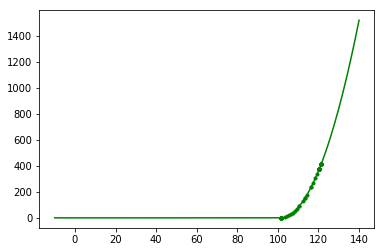

In [6]:
# Graph results
plot_problem(simulated_annealing_results[0])